<a href="https://www.kaggle.com/code/natalyyakobov/binary-classification-95-acc-alzheimers?scriptVersionId=187155953" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://octodex.github.com/images/labtocat.png" width=200 height=200 />

## Doctor, is he sick? does he have Alzheimer's disease? 😯🩺 <br>
Let's see.. <br> 
well, this algorithm can detect if the patient is sick with 94% accuracy <br>
# To sum up
In this project I explored the 🧠 Alzheimers disease dataset downloaded from Kaggle.com <br>
The most **relevant features** for this **xgboost** model are as follows:
1. **Functional Assessment** (ranging from 0 to 10. Lower scores indicate greater impairment)
2. **ADL (Activities of Daily Living** score, ranging from 0 to 10. Lower scores indicate greater impairment)
3. **MMSE (Mini-Mental State Examination** score, ranging from 0 to 30. Lower scores indicate cognitive impairment)
4. **Memory Complaints**
5. **Behavioral Problems**

And there are some more (not so much contributing) features:  

6. Cholesterol HDL
7. Diet Quality
8. Sleep Quality
9. Alcohol Consumption
10. Cholesterol Triglycerides


# Binary Classification- workflow
Main steps:
- Exploratory Data Analysis (EDA): Visualize features' relationships and distributions. Check some statistics. 
- Data Preprocessing: Scale the cumulative features. Covert categorical features to binary.
- Model Training: Train some models on the preprocessed data (Models: SVM, Logistic Regression, Random Forest, GBoost, Naive Bayes, XGBoost with Random searchCV, Neural Networks). Select 10 features with higher importance to improve the models.
- Model Evaluation: Evaluate the models' performances. Plot the Neural Networks' validation graph.

<br>
The model was fit to patients who had normal levels of cholesterol and blood pressure, in the ages of 60-90 years old.

when symptoms appear after the age of 60 it implies that we are talking about late-onset Alzheimer's disease(AD). 
I expect family history to positively correlate with AD positives:

> Family history of dementia (FH) is a recognized risk factor for developing late-onset Alzheimer's disease [(pubmed article)](https://pubmed.ncbi.nlm.nih.gov/26531229/).

I'm gonna illustrate that later on by plotting the FamilyHistoryAlzheimers feature for AD positives.

<br>
Plus, I'd like to see how higher education relates to AD positives. I'm gonna use the EducationLevel feature for that.

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
   for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


**Read .csv as a dataframe**

In [2]:
data=pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')

**Check the DataFrame**

In [3]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
data.drop(["PatientID",'DoctorInCharge'],axis=1,inplace=True)

In [6]:
np.transpose(data.describe())

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


# Exploratory Data Analysis

Let's check out the target feature's distribution

<Axes: xlabel='Diagnosis', ylabel='count'>

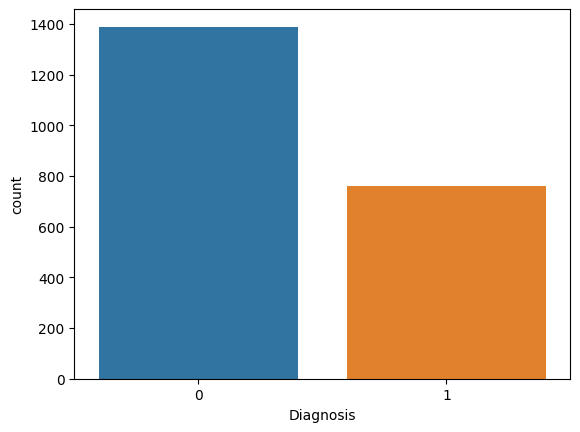

In [7]:
sns.countplot(data,x='Diagnosis')

At first glance, it's evident that the data is skewed heavily towards individuals without Alzheimer's Disease.

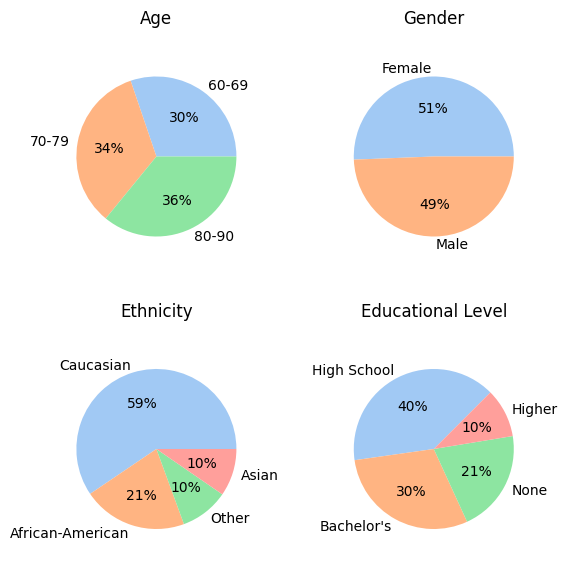

In [8]:
# Define colors palette
colors = sns.color_palette('pastel')[0:5]

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Pie chart for Age
data['bins'] = pd.cut(data['Age'], bins=[60, 69, 79, 90], labels=["60-69", "70-79", "80-90"])
axs[0, 0].pie(data.groupby('bins').size(), labels=data.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)
axs[0, 0].set_title("Age")

# Pie chart for Gender
axs[0, 1].pie(data['Gender'].value_counts(), labels=['Female', 'Male'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[0, 1].set_title("Gender")

# Pie chart for Ethnicity
axs[1, 0].pie(data['Ethnicity'].value_counts(), labels=['Caucasian', 'African-American', 'Other', 'Asian'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 0].set_title("Ethnicity")

# Pie chart for Educational Level
axs[1, 1].pie(data['EducationLevel'].value_counts(), startangle=45, labels=['High School', "Bachelor's", 'None', 'Higher'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 1].set_title("Educational Level")

# Remove the 'bins' column from the data
data.drop(['bins'], axis=1, inplace=True)

# Adjust layout and display
plt.tight_layout()
plt.show()

For the age pie chart, the highest proportion of patients falls within the 80-90 age group. Gender distribution is balanced. In terms of ethnicity, Caucasian patients are the most prevalent. The most common educational levels are high school followed by bachelor's degrees.

Checking the Diagnosis=1 distribution of EducationLevel, Ethnicity and FamilyHistoryAlzheimers:

In [9]:
def create_diagnosis_dataframe(column_name, index_mapping):
    total = data[column_name].value_counts().sort_index()
    total.name='Total'
    diagnosis1 = data.groupby(column_name)['Diagnosis'].sum()
    percentage = diagnosis1 / total * 100
    percentage.name = 'Diagnosis, %'
    
    df = pd.concat([total, diagnosis1, percentage], axis=1)
    df['Total, %'] = 100  
    df.index = index_mapping
    return df
    

print("Education Level DataFrame:")
df_educ=create_diagnosis_dataframe('EducationLevel', ['None', 'Highschool', "Bachelor's", 'Higher'])
print(df_educ,'\n')

print("Ethnicity DataFrame:")
df_ethn=create_diagnosis_dataframe('Ethnicity', ['Caucasian', 'African-American', 'Asian', 'Other'])
print(df_ethn,'\n')

print("Family History of Alzheimer's DataFrame:")
df_famh=create_diagnosis_dataframe('FamilyHistoryAlzheimers', ['Yes', 'No'])
print(df_famh,'\n')

Education Level DataFrame:
            Total  Diagnosis  Diagnosis, %  Total, %
None          446        174     39.013453       100
Highschool    854        302     35.362998       100
Bachelor's    636        217     34.119497       100
Higher        213         67     31.455399       100 

Ethnicity DataFrame:
                  Total  Diagnosis  Diagnosis, %  Total, %
Caucasian          1278        463     36.228482       100
African-American    454        146     32.158590       100
Asian               206         84     40.776699       100
Other               211         67     31.753555       100 

Family History of Alzheimer's DataFrame:
     Total  Diagnosis  Diagnosis, %  Total, %
Yes   1607        583     36.278780       100
No     542        177     32.656827       100 



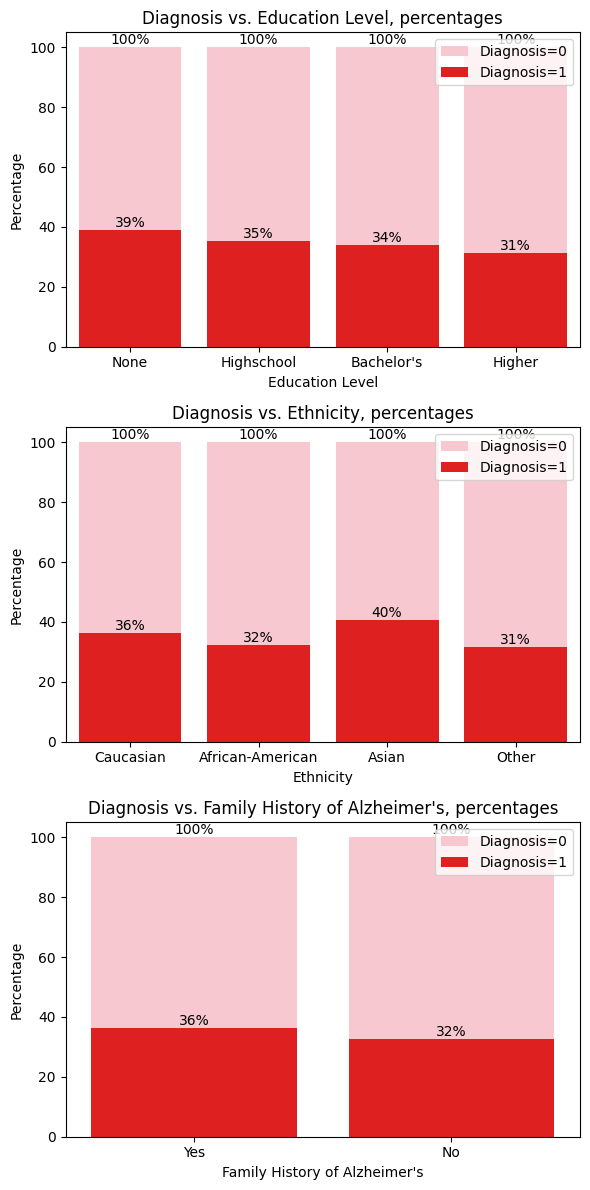

In [10]:
def plot_diagnosis_vs_category(ax, df, category_name):
    sns.barplot(x=df.index, y='Total, %', data=df, color='pink', label='Diagnosis=0', ax=ax, ci=None)
    sns.barplot(x=df.index, y='Diagnosis, %', data=df, color='red', label='Diagnosis=1', ax=ax, ci=None)
    ax.set_title(f"Diagnosis vs. {category_name}, percentages")
    ax.set_xlabel(category_name)
    ax.set_ylabel('Percentage')
    ax.legend()
    for container in ax.containers:
        labels = [f'{int(v.get_height())}%' for v in container]
        ax.bar_label(container, labels=labels, label_type='edge')

fig, axs = plt.subplots(3, 1, figsize=(6, 12))  # Adjust figure size to fit the bars better

plot_diagnosis_vs_category(axs[0], df_educ, "Education Level")
plot_diagnosis_vs_category(axs[1], df_ethn, "Ethnicity")
plot_diagnosis_vs_category(axs[2], df_famh, "Family History of Alzheimer's")
plt.tight_layout()
plt.show()

Diagnosis vs. Education Level: A gentle decline is observed along the x-axis, suggesting that higher levels of education might correlate with a reduced risk of Alzheimer's Disease (AD).

Diagnosis vs. Ethnicity: The data suggests a slightly elevated likelihood of AD among individuals of Asian descent.

Diagnosis vs. Family History of Alzheimer's: The analysis indicates no significant effect, suggesting that family history does not seem to influence AD risk in this dataset. 😮 Contrary to expectations 😮, the occurrence of family history among AD-diagnosed patients is lower.


 I'm gonna check that out statistically with some chi-square tests:

In [11]:
import scipy.stats as stats
def calculate_chi_square(data, description):
    # Calculate the 'Not' column
    data['Not'] = data['Total'] - data['Diagnosis']
    
    # Create the observed values array
    observed = np.array(data[['Diagnosis', 'Not']].values)
    
    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    
    # Print the p-value with the description
    print(f"{description} p-value: {round(p,3)}")

calculate_chi_square(df_educ, 'EducationLevel')
calculate_chi_square(df_ethn, 'Ethnicity')
calculate_chi_square(df_famh, 'FamilyHistoryAlzheimers')

EducationLevel p-value: 0.217
Ethnicity p-value: 0.098
FamilyHistoryAlzheimers p-value: 0.141


The p-value is 0.217, which is greater than alpha level of 0.05. This means that there is no statistically significant difference among the different **Education Levels**.

🔥The p-value is 0.098🔥, which is greater than alpha level of 0.05 but less than 0.10. This suggests that there is a weak evidence against the null hypothesis, implying that there may be some differences among the different **Ethnic groups**. 

The p-value is 0.141, which is greater than alpha level of 0.05. This means that there is no statistically significant difference between the two groups of **family history**. 


**Select cumulative columns To scale**

In [12]:
cols2scale=(data.columns[data.dtypes=='float64']).tolist()+['Age','SystolicBP','DiastolicBP']
data[cols2scale].head()

,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Age,SystolicBP,DiastolicBP
0,22.927749,13.297218,6.327112,1.347214,9.025679,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,1.725883,73,142,72
1,26.827681,4.542524,7.619885,0.518767,7.151293,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,2.592424,89,115,64
2,17.795882,19.555085,7.844988,1.826335,9.673574,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,7.119548,73,99,116
3,33.800817,12.209266,8.428001,7.435604,8.392554,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,6.481226,74,118,115
4,20.716974,18.454356,6.310461,0.795498,5.597238,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0.014691,89,94,117


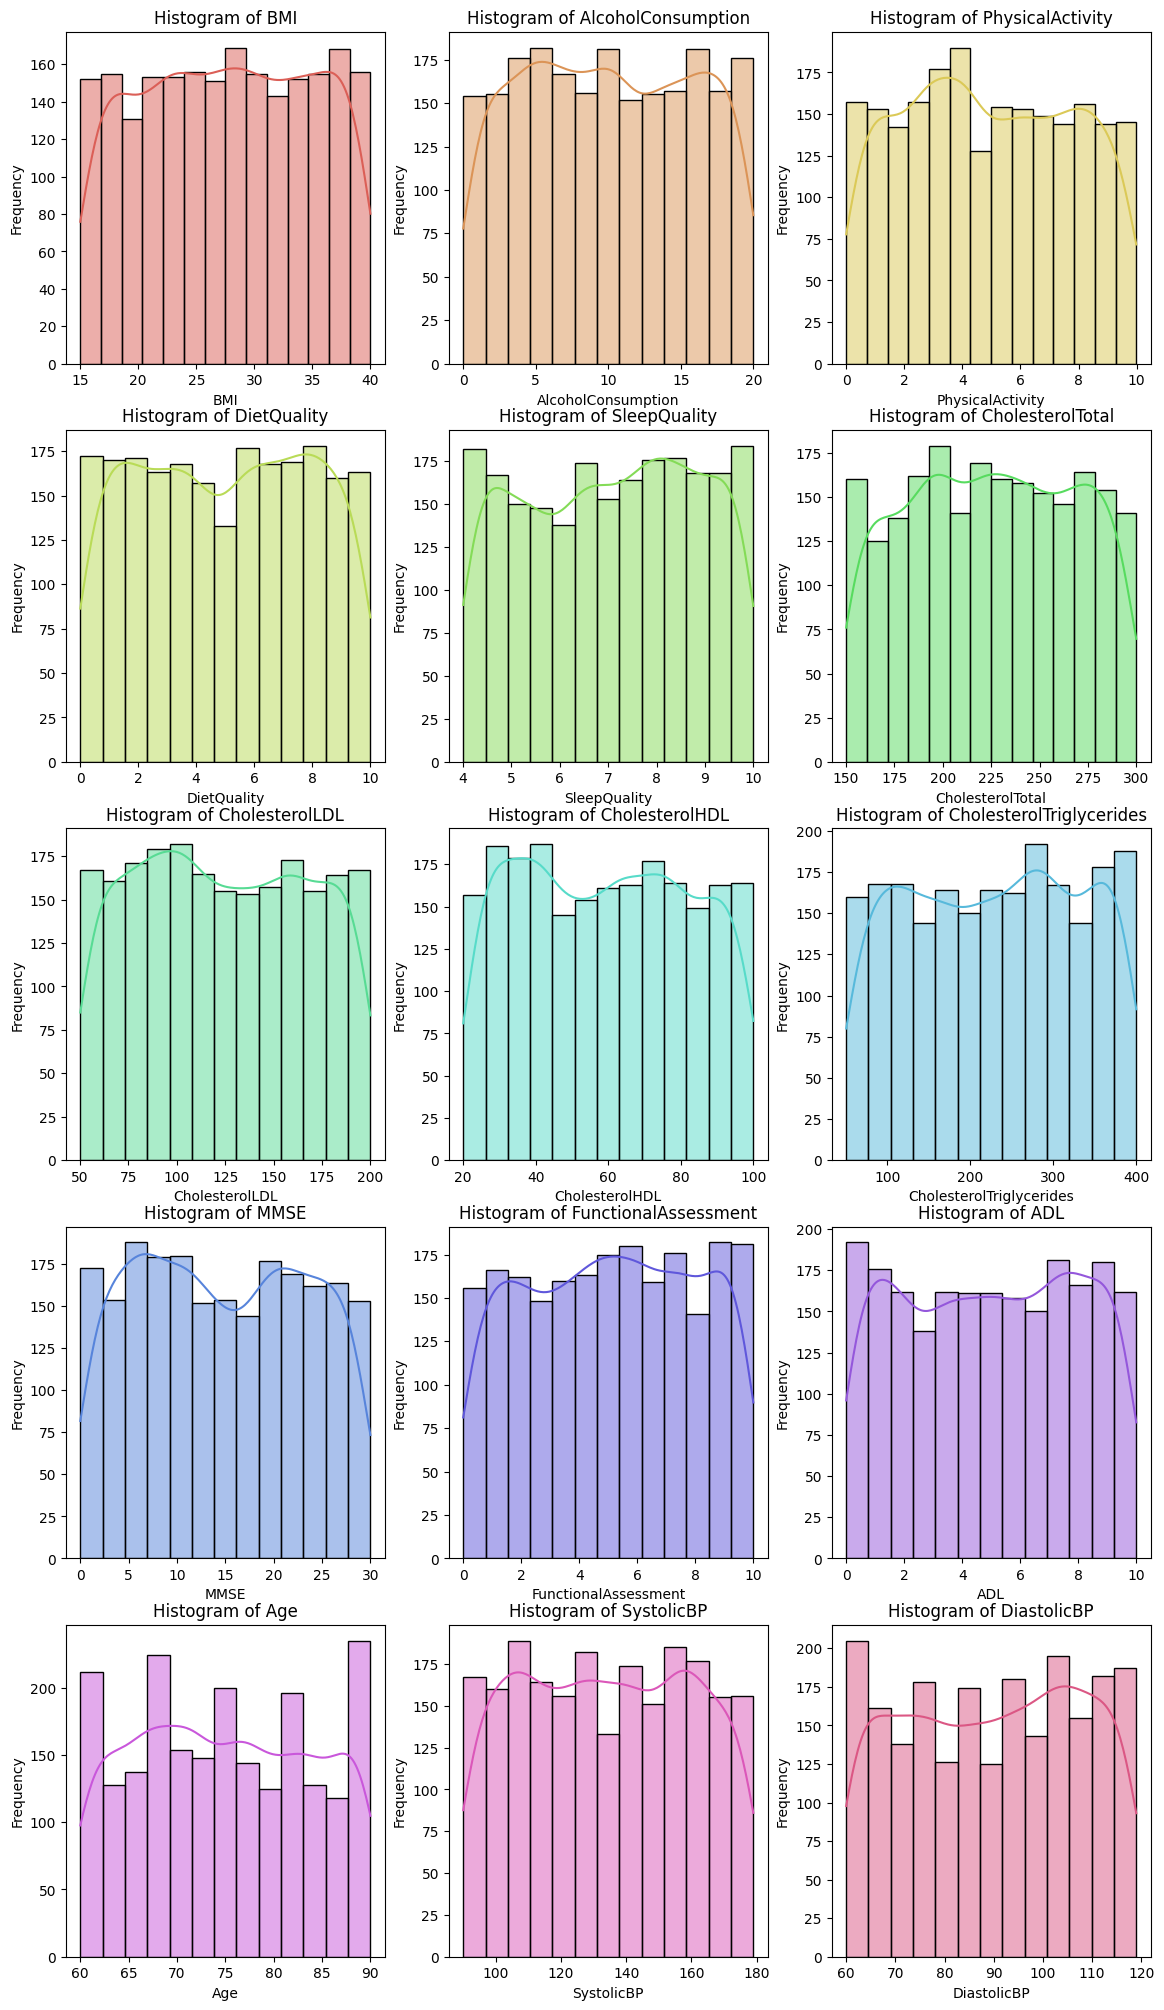

In [13]:
num_cols = len(cols2scale)
num_rows = (num_cols + 1) // 3  # This creates a grid with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(14, num_rows * 5))
# Flatten the axes array for easy iteration
axes = axes.flatten()
colors=sns.color_palette("hls", num_cols)
for i, col in enumerate(cols2scale):
    sns.histplot(data[col], kde=True, ax=axes[i],color=colors[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

The histograms show that the cumulative features' distributions are within the normal range with no outliers.

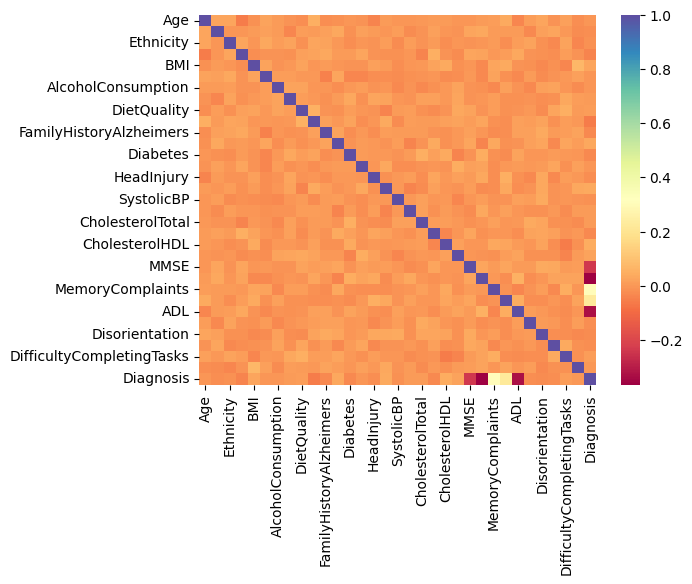

In [14]:
sns.heatmap(data.corr(),cmap='Spectral')
plt.show()

There is a correlation between FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL and the Diagnosis. 

Let's have a closer look on those features.

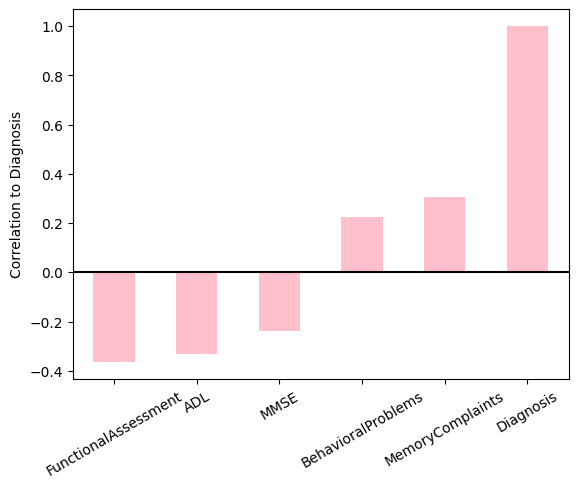

In [15]:
corr_matrix=data.corr()['Diagnosis']
heatcol=data.columns[corr_matrix.abs() > 0.1]
data[heatcol].corr()['Diagnosis'].sort_values().plot(kind='bar',color='pink')
plt.axhline(0, color="k")
plt.ylabel('Correlation to Diagnosis')
plt.xticks( rotation=30)
plt.show()

As anticipated, reductions in functional assessment, activities of daily living (ADL), and mental state exams (MMSE), coupled with increases in behavioral problems and memory complaints, are linked with AD positives. Cognitive and functional assessments emerge as pivotal features in identifying AD.

**Scale the data**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data[cols2scale]=scaler.fit_transform(data[cols2scale])

Convert the categorical variables to dummy

In [17]:
data=pd.get_dummies(data, columns=['Ethnicity','EducationLevel'], prefix=['Ethnicity','EducationLevel'])
boo=data.columns[data.dtypes==bool].tolist()
data[boo]=data[boo].astype('Int64')

# Binary Classification models

**Prepare data for training**

In [18]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X=data.drop('Diagnosis',axis=1)
y=data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

**Initialize, Train, Predict and Evluate**

## Support Vector Machines

In [19]:
from sklearn.metrics import classification_report

from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train, y_train)
pred_svc= svc.predict(X_test)
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       205
           1       0.79      0.69      0.74       118

    accuracy                           0.82       323
   macro avg       0.81      0.79      0.80       323
weighted avg       0.82      0.82      0.82       323



## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)
pred_log = log.predict(X_test)
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       205
           1       0.80      0.69      0.74       118

    accuracy                           0.82       323
   macro avg       0.82      0.80      0.80       323
weighted avg       0.82      0.82      0.82       323



## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pred_rfc= rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       205
           1       0.96      0.86      0.91       118

    accuracy                           0.94       323
   macro avg       0.94      0.92      0.93       323
weighted avg       0.94      0.94      0.94       323



## Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train, y_train)
pred_nbc = nbc.predict(X_test)
print(classification_report(y_test,pred_nbc))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       205
           1       0.77      0.72      0.74       118

    accuracy                           0.82       323
   macro avg       0.81      0.80      0.80       323
weighted avg       0.82      0.82      0.82       323



## GBoost Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
pred_gbc= gbc.predict(X_test)
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       205
           1       0.94      0.92      0.93       118

    accuracy                           0.95       323
   macro avg       0.95      0.94      0.95       323
weighted avg       0.95      0.95      0.95       323



**Select the best features (top 10)**


Let's use Random Forests's model's importances.

Random Forests can handle complex data and relationships without overfitting, making their importance scores reliable. These scores help in selecting the key features, simplifying the model, and improving performance. 

Plus, Random Forests work well with different types of data and are efficient with large datasets, making them a practical choice.

In [24]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfc.feature_importances_})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)
print(top_features)
X_train_best=X_train[top_features['Feature']]
X_test_best=X_test[top_features['Feature']]

                     Feature  Importance
21      FunctionalAssessment    0.191241
24                       ADL    0.160855
20                      MMSE    0.124801
22          MemoryComplaints    0.081438
23        BehavioralProblems    0.044184
18            CholesterolHDL    0.031537
2                        BMI    0.029876
16          CholesterolTotal    0.029500
6                DietQuality    0.029284
19  CholesterolTriglycerides    0.028864


## XGBoost Classifier

This gradient boosting model often achieves high performance and handles imbalanced datasets effectively.

Let's check it out and try to enhence it's performance in 3 versions: 

(1) with all features

(2) with top 10 features  

(3) with Randomized SearchCV

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
pred_xgb = xgb.predict(X_test)
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       205
           1       0.97      0.94      0.95       118

    accuracy                           0.97       323
   macro avg       0.97      0.96      0.96       323
weighted avg       0.97      0.97      0.97       323



In [26]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_best,y_train)
pred_xgb_best = xgb.predict(X_test_best)
print(classification_report(y_test,pred_xgb_best))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       205
           1       0.96      0.91      0.93       118

    accuracy                           0.95       323
   macro avg       0.95      0.94      0.95       323
weighted avg       0.95      0.95      0.95       323



Use Randomized SearchCV and re-train the XGBoost model

In [27]:
# Define the parameter grid
param_grid = {
    'n_estimators': [250, 300],
    'learning_rate': [0.04, 0.05],
    'max_depth': [8, 9, 10, 11],
    'min_child_weight': [4,5,6],
    'gamma': [1,1.5,3],
    'subsample': [ 0.7, 0.8],
    'colsample_bytree': [0.5, 0.6, 0.7]
}
# Initialize the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=3, verbose=0, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to your data
random_search.fit(X_train_best, y_train)

# Retrieve the best model
print(random_search.best_params_)
pred_xgb_best_rand = random_search.best_estimator_.predict(X_test_best)
print(classification_report(y_test,pred_xgb_best_rand))

{'subsample': 0.8, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.04, 'gamma': 3, 'colsample_bytree': 0.5}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       205
           1       0.96      0.93      0.95       118

    accuracy                           0.96       323
   macro avg       0.96      0.96      0.96       323
weighted avg       0.96      0.96      0.96       323



## Neural Networks

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

nnc=Sequential()
nnc.add(Input(shape=(X_train.shape[1],)))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.4))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.4))
nnc.add(Dense(32,'relu'))
nnc.add(Dropout(0.4))
nnc.add(Dense(1,'sigmoid'))

nnc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=nnc.fit(X_train,y_train,epochs=250,batch_size=64,validation_data=(X_test,y_test),callbacks=[early])
pred_nnc=(nnc.predict(X_test) > 0.4).astype("int32")

2024-07-06 23:06:04.635338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 23:06:04.635465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 23:06:04.781011: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5550 - loss: 0.6855 - val_accuracy: 0.6347 - val_loss: 0.6374
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6511 - loss: 0.6495 - val_accuracy: 0.6347 - val_loss: 0.6314
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6401 - loss: 0.6438 - val_accuracy: 0.6347 - val_loss: 0.6077
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6629 - loss: 0.6127 - val_accuracy: 0.6347 - val_loss: 0.5890
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6711 - loss: 0.5964 - val_accuracy: 0.6935 - val_loss: 0.5507
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6949 - loss: 0.5785 - val_accuracy: 0.7214 - val_loss: 0.5114
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.5472 - val_accuracy: 0.7678 - val_loss: 0.4712
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7675 - loss: 0.4945 - val_accuracy: 0.7709 - 

In [29]:
print(classification_report(y_test,pred_nnc))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       205
           1       0.76      0.79      0.78       118

    accuracy                           0.83       323
   macro avg       0.82      0.82      0.82       323
weighted avg       0.83      0.83      0.83       323



Let's use top 10 features only and re-train the neural network model

In [30]:
nnc=Sequential()
nnc.add(Input(shape=(X_train_best.shape[1],)))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.2))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.2))
nnc.add(Dense(64,'relu'))
nnc.add(Dropout(0.2))
nnc.add(Dense(32,'relu'))
nnc.add(Dropout(0.2))
nnc.add(Dense(1,'sigmoid'))

nnc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history_best=nnc.fit(X_train_best,y_train,epochs=250,batch_size=64,validation_data=(X_test_best,y_test),callbacks=[early])
pred_nnc_best=(nnc.predict(X_test_best) > 0.5).astype("int32")

Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6036 - loss: 0.6669 - val_accuracy: 0.6347 - val_loss: 0.5840
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6851 - loss: 0.5596 - val_accuracy: 0.8019 - val_loss: 0.4425
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.4699 - val_accuracy: 0.8266 - val_loss: 0.3910
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.4604 - val_accuracy: 0.8421 - val_loss: 0.3829
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.4355 - val_accuracy: 0.8483 - val_loss: 0.3726
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 0.3825 - val_accuracy: 0.8514 - val_loss: 0.3743
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8224 - loss: 0.3999 - val_accuracy: 0.8421 - val_loss: 0.3612
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8325 - loss: 0.3901 - val_accuracy: 0.8452 - 

In [31]:
print(classification_report(y_test,pred_nnc_best))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       205
           1       0.90      0.84      0.87       118

    accuracy                           0.91       323
   macro avg       0.91      0.89      0.90       323
weighted avg       0.91      0.91      0.91       323



Plot the Training and Validation Loss Curves for the Neural Network Models with all features and with top 10 best features

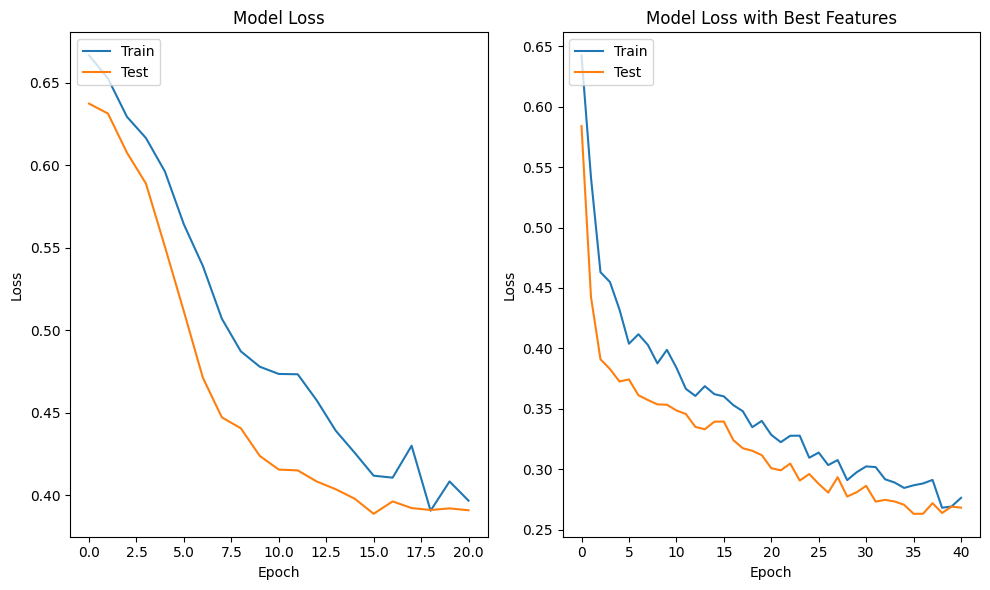

In [32]:
plt.figure(figsize=(10, 6))

# Plot for the first model
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot for the second model 
plt.subplot(1, 2, 2)
plt.plot(history_best.history['loss'])
plt.plot(history_best.history['val_loss'])
plt.title('Model Loss with Best Features')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

The graphs suggest that there is no overfitting observed, as evidenced by the absence of an increase in the test curve. This absence of overfitting is a positive outcome, indicating that the model's performance generalizes well to unseen data.

# Comparing Models

When the target variable's distribution is biased, it means one group appears much more often than others in the dataset. 

This can make models lean towards predicting the most common outcome, which leads to weaker performance on less frequent outcomes. 

Accuracy numbers might look good because the model predicts the common outcome well, even if it struggles with the less common ones. This imbalance affects how well the model can distinguish between different groups. 

To fix this, techniques like adjusting the dataset or using different evaluation methods are used to make sure all outcomes get fair consideration. 

I'm gonna evaluate the models with 3 metrics: precision, recall, and F1-score.

In this case, where there are twice as many healthy patients as sick ones, accuracy alone could be misleading since it might just predict "healthy" most of the time. Precision tells you how many of the predicted "sick" patients are actually sick, recall shows how many of the actual sick patients were correctly identified, and the F1-score balances these two to give a better overall measure. This helps ensure the model is effective for both healthy and sick patients, despite the imbalance.

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define models and their predictions
models = ['Support Vector Machines', 'Logistic Regression', 'Random Forest', 
          'Naive Bayes', 'GBoost', 'XGBoost', 'XGBoost Top10', 
          'XGBoost Top10 + randsearch', 'Neural Network', 'Neural Network Top10']

y_true = y_test
y_preds = [pred_svc, pred_log, pred_rfc, pred_nbc, pred_gbc, pred_xgb, 
           pred_xgb_best, pred_xgb_best_rand, pred_nnc, pred_nnc_best]

# Initialize lists to store metrics
metrics = {'Model': models}
metrics['Precision'] = [f'{precision_score(y_true, y_pred)*100:.1f}%' for y_pred in y_preds]
metrics['Recall'] = [f'{recall_score(y_true, y_pred)*100:.1f}%' for y_pred in y_preds]
metrics['F1-score'] = [f'{f1_score(y_true, y_pred)*100:.1f}%' for y_pred in y_preds]

# Create a DataFrame to display metrics for each model
df_metrics = pd.DataFrame(metrics)

# Sort DataFrame by F1-score in descending order
df_metrics_sorted = df_metrics.sort_values(by='F1-score', ascending=False)

# Display the sorted dataframe
print("Metrics Comparison for Binary Classification Models (Sorted by F1-score):")
print(df_metrics_sorted)

Metrics Comparison for Binary Classification Models (Sorted by F1-score):
                        Model Precision Recall F1-score
5                     XGBoost     96.5%  94.1%    95.3%
7  XGBoost Top10 + randsearch     96.5%  93.2%    94.8%
4                      GBoost     94.0%  92.4%    93.2%
6               XGBoost Top10     95.5%  90.7%    93.0%
2               Random Forest     96.2%  86.4%    91.1%
9        Neural Network Top10     90.0%  83.9%    86.8%
8              Neural Network     76.2%  78.8%    77.5%
1         Logistic Regression     79.6%  69.5%    74.2%
3                 Naive Bayes     76.6%  72.0%    74.2%
0     Support Vector Machines     79.4%  68.6%    73.6%


To conclude, the best model is XGBoost, achieving up to 95% F1-score or weighted accuracy. 


Using the top 10 features and the best parameters obtained from randomized search CV DIDN'T HELP improving performance but I had to try. 

I enjoyed this dataset very much. if you read this and enjoy somehow too, upvoting is super duper appreciated❤️❤️❤️